In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from fbprophet import Prophet


In [7]:
df = pd.read_csv('dataset.csv')
df

,서울,관용,자가용,영업용,계,말소,실제대수
0,2010-01-01,10521,2729799,215977,2956297,8069,2948228
1,2010-02-01,10567,2734111,216815,2961493,6948,2954545
2,2010-03-01,10625,2736078,217805,2964508,8607,2955901
3,2010-04-01,10735,2739234,218088,2968057,7769,2960288
4,2010-05-01,10696,2734013,218591,2963300,7773,2955527
...,...,...,...,...,...,...,...
133,2021-02-01,"12,691","2,942,790","202,621","3,158,102",7489,3150613
134,2021-03-01,"12,610","2,943,678","202,422","3,158,710",10159,3148551
135,2021-04-01,"12,421","2,944,563","202,091","3,159,075",8827,3150248
136,2021-05-01,"12,426","2,946,076","202,127","3,160,629",7844,3152785


In [8]:
df

,서울,관용,자가용,영업용,계,말소,실제대수
0,2010-01-01,10521,2729799,215977,2956297,8069,2948228
1,2010-02-01,10567,2734111,216815,2961493,6948,2954545
2,2010-03-01,10625,2736078,217805,2964508,8607,2955901
3,2010-04-01,10735,2739234,218088,2968057,7769,2960288
4,2010-05-01,10696,2734013,218591,2963300,7773,2955527
...,...,...,...,...,...,...,...
133,2021-02-01,"12,691","2,942,790","202,621","3,158,102",7489,3150613
134,2021-03-01,"12,610","2,943,678","202,422","3,158,710",10159,3148551
135,2021-04-01,"12,421","2,944,563","202,091","3,159,075",8827,3150248
136,2021-05-01,"12,426","2,946,076","202,127","3,160,629",7844,3152785


In [32]:
df['ds']=df['서울']
df['y']=df['실제대수']
df

,서울,관용,자가용,영업용,계,말소,실제대수,year,ds,y
0,2010-01-01,10521,2729799,215977,2956297,8069,2948228,2010,2010-01-01,2948228
1,2010-02-01,10567,2734111,216815,2961493,6948,2954545,2010,2010-02-01,2954545
2,2010-03-01,10625,2736078,217805,2964508,8607,2955901,2010,2010-03-01,2955901
3,2010-04-01,10735,2739234,218088,2968057,7769,2960288,2010,2010-04-01,2960288
4,2010-05-01,10696,2734013,218591,2963300,7773,2955527,2010,2010-05-01,2955527
...,...,...,...,...,...,...,...,...,...,...
133,2021-02-01,"12,691","2,942,790","202,621","3,158,102",7489,3150613,2021,2021-02-01,3150613
134,2021-03-01,"12,610","2,943,678","202,422","3,158,710",10159,3148551,2021,2021-03-01,3148551
135,2021-04-01,"12,421","2,944,563","202,091","3,159,075",8827,3150248,2021,2021-04-01,3150248
136,2021-05-01,"12,426","2,946,076","202,127","3,160,629",7844,3152785,2021,2021-05-01,3152785


In [33]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
future = m.make_future_dataframe(periods=12,freq='m')
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
145,2022-01-31,3.166365e+06,3.155090e+06,3.173423e+06,3.158934e+06,3.174890e+06,-3172.629489,-3172.629489,-3172.629489,-3172.629489,-3172.629489,-3172.629489,0.0,0.0,0.0,3.163192e+06
146,2022-02-28,3.167961e+06,3.164642e+06,3.185817e+06,3.158745e+06,3.178255e+06,7208.861871,7208.861871,7208.861871,7208.861871,7208.861871,7208.861871,0.0,0.0,0.0,3.175170e+06
147,2022-03-31,3.169729e+06,3.162424e+06,3.187025e+06,3.158934e+06,3.181956e+06,4243.288839,4243.288839,4243.288839,4243.288839,4243.288839,4243.288839,0.0,0.0,0.0,3.173972e+06
148,2022-04-30,3.171440e+06,3.158224e+06,3.185882e+06,3.158888e+06,3.185889e+06,-433.836775,-433.836775,-433.836775,-433.836775,-433.836775,-433.836775,0.0,0.0,0.0,3.171006e+06
149,2022-05-31,3.173207e+06,3.153493e+06,3.185908e+06,3.158499e+06,3.189590e+06,-4586.769492,-4586.769492,-4586.769492,-4586.769492,-4586.769492,-4586.769492,0.0,0.0,0.0,3.168621e+06


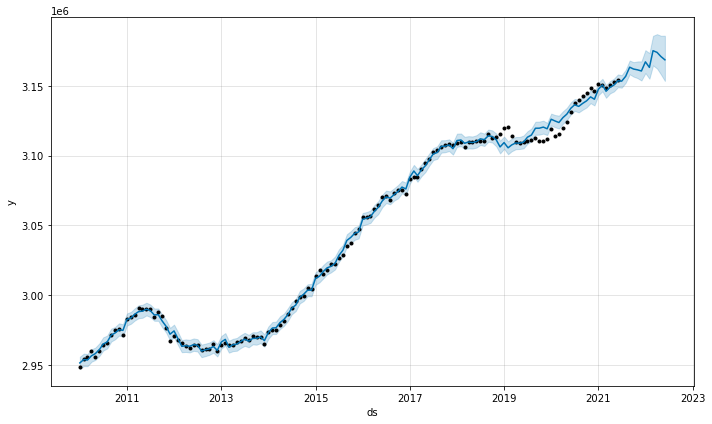

In [41]:
fig1 = m.plot(forecast)


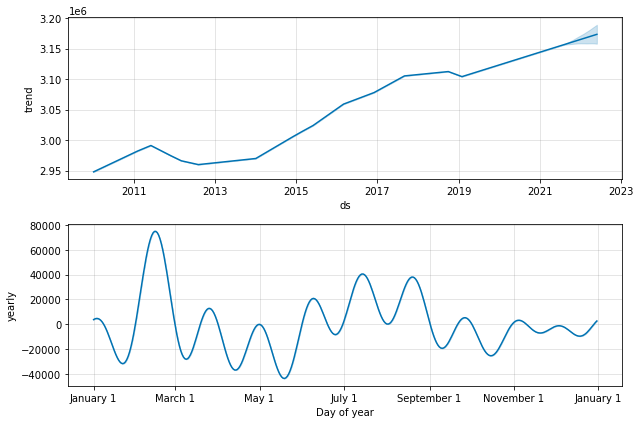

In [29]:
fig2 = m.plot_components(forecast)

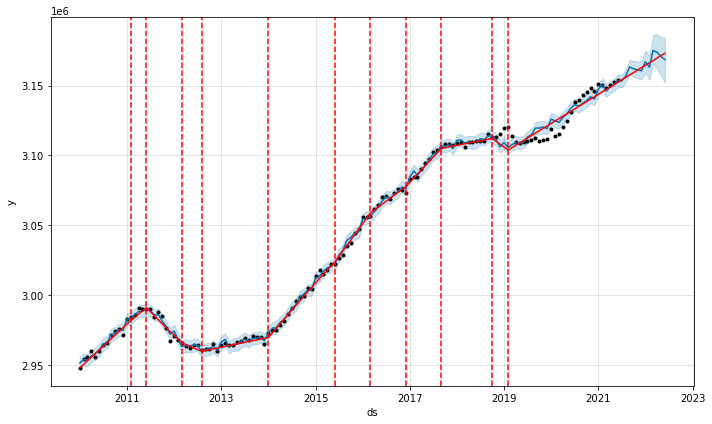

In [30]:
# 빨간선(트랜드선) 변화주기
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [35]:
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(df)

In [37]:
 
#
# 5일을 내다보며 예측합니다.
future_data = prophet.make_future_dataframe(periods=365, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
498,2022-05-28,3.153912e+06,3.125924e+06,3.182242e+06
499,2022-05-29,3.157567e+06,3.128295e+06,3.184523e+06
500,2022-05-30,3.163628e+06,3.135864e+06,3.190604e+06
501,2022-05-31,3.169708e+06,3.140875e+06,3.196475e+06
502,2022-06-01,3.172787e+06,3.143805e+06,3.200032e+06


In [ ]:
# fig1 = prophet.plot(forecast_data)

In [ ]:
# green_diamond = dict(markerfacecolor='g', marker='D')
# plt.boxplot(df['실제대수'], flierprops=green_diamond)
# plt.title("car box plot")
# plt.show()


In [ ]:
# green_diamond = dict(markerfacecolor='g', marker='D')
# plt.boxplot(df['실제대수'], vert=False, flierprops=green_diamond)
# plt.title("tips box plot")
# plt.show()

In [ ]:
# X = df["year"]
# y = df["y"]
# plt.plot(X, y, 'o')
# plt.show()

In [ ]:
# line_fitter = LinearRegression()
# line_fitter.fit(X.values.reshape(-1,1), y)

In [ ]:
# line_fitter.predict([[2022]])

In [ ]:
# plt.plot(X, y, 'o')
# plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))
# plt.show()